# Predict Highest Bid in Auction

In [1]:
import warnings
warnings.filterwarnings('ignore')

Load Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

Set working directory to dataset folder [Suitable for working with multiple files]

In [3]:
import os
os.chdir("D:/Datasets/auction")
np.set_printoptions(precision=4)

# Step - 1

## Data Acquisition

Download Dataset From <a href="https://www.kaggle.com/onlineauctions/online-auctions-dataset/download">Here</a>

In [4]:
df = pd.read_csv('auction.csv')

Know The Data

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10681 non-null  int64  
 1   bid           10681 non-null  float64
 2   bidtime       10681 non-null  float64
 3   bidder        10665 non-null  object 
 4   bidderrate    10670 non-null  float64
 5   openbid       10681 non-null  float64
 6   price         10681 non-null  float64
 7   item          10681 non-null  object 
 8   auction_type  10681 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


# Step - 2

## Preprocessing

Drop The Column bidder

In [6]:
df = df.drop(columns=['bidder'])
df.columns

Index(['auctionid', 'bid', 'bidtime', 'bidderrate', 'openbid', 'price', 'item',
       'auction_type'],
      dtype='object')

Handle Missing Data

In [7]:
df.isna().any()

auctionid       False
bid             False
bidtime         False
bidderrate       True
openbid         False
price           False
item            False
auction_type    False
dtype: bool

In [8]:
df.bidderrate.fillna(0, inplace=True)

Change Categorical Data to Numerical Data

In [9]:
encoders = {}
for col, _type in zip(df.columns, df.dtypes):
    if _type == 'object':
        encoders[col] = LabelEncoder()
        df[col] = encoders[col].fit_transform(df[col])
df.head()

,auctionid,bid,bidtime,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,0.0,99.0,177.5,0,0
1,1638893549,100.0,2.600116,0.0,99.0,177.5,0,0
2,1638893549,120.0,2.600810,2.0,99.0,177.5,0,0
3,1638893549,150.0,2.601076,2.0,99.0,177.5,0,0
4,1638893549,177.5,2.909826,4.0,99.0,177.5,0,0


In [10]:
temp = df.groupby('auctionid').mean()
temp['price'] = df.groupby('auctionid').max()['price']
df = temp

# Step - 3

## Feature Selection

Check Correlation

In [11]:
df.corr()

,bid,bidtime,bidderrate,openbid,price,item,auction_type
bid,1.000000,0.005059,-0.034671,0.814987,0.955815,-0.470146,0.086227
bidtime,0.005059,1.000000,-0.017270,0.139177,-0.067093,0.175095,0.680728
bidderrate,-0.034671,-0.017270,1.000000,-0.032309,-0.043015,-0.044439,0.074464
openbid,0.814987,0.139177,-0.032309,1.000000,0.642847,-0.263262,-0.008381
price,0.955815,-0.067093,-0.043015,0.642847,1.000000,-0.517405,0.116214
item,-0.470146,0.175095,-0.044439,-0.263262,-0.517405,1.000000,-0.072859
auction_type,0.086227,0.680728,0.074464,-0.008381,0.116214,-0.072859,1.000000


<AxesSubplot:>

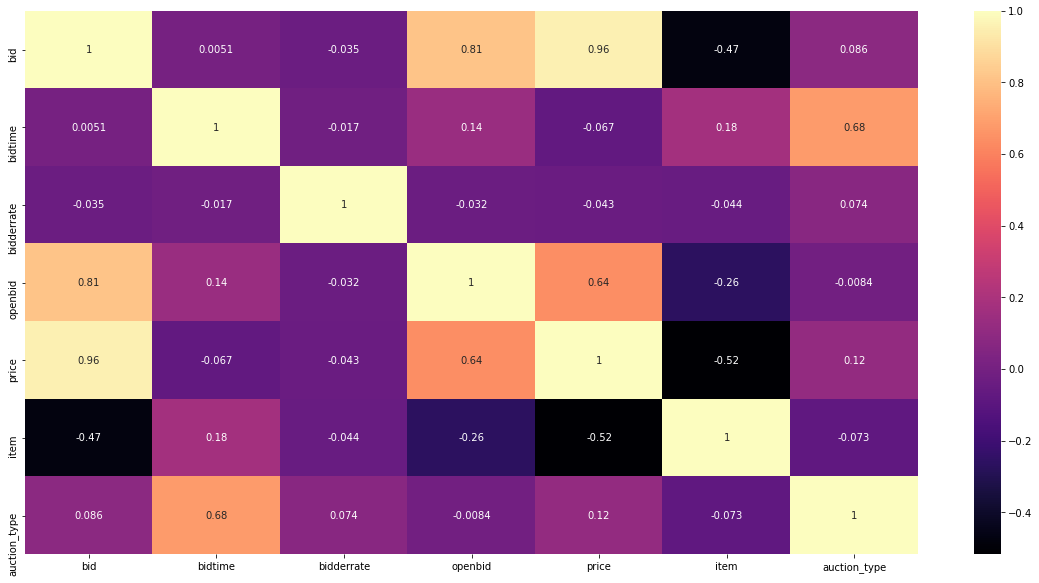

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='magma')

Splitting Dependent and Independent Varialbles

In [13]:
cols = df.drop('price', axis=1).columns
X = df[cols]
y = df['price'].values

In [14]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

Dummy Model to check Important Features

In [15]:
model = ExtraTreesRegressor().fit(X, y)
model.feature_importances_

array([0.7183, 0.0123, 0.0087, 0.1028, 0.1557, 0.0023])

Visualization

<BarContainer object of 6 artists>

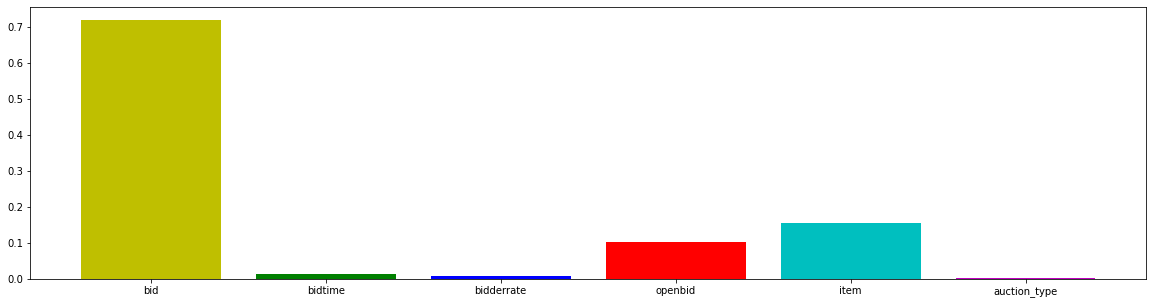

In [16]:
plt.figure(figsize=(20, 5))
plt.bar(
    x=cols, 
    height=model.feature_importances_, 
    color = 'ygbrcmb'
)

# Step - 4

## Model Building

Split Train Test Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Create Simple Model and check Accuracy

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9603334070993416

anything above 90% is good<br>
Now check prediction Distribution 

<AxesSubplot:>

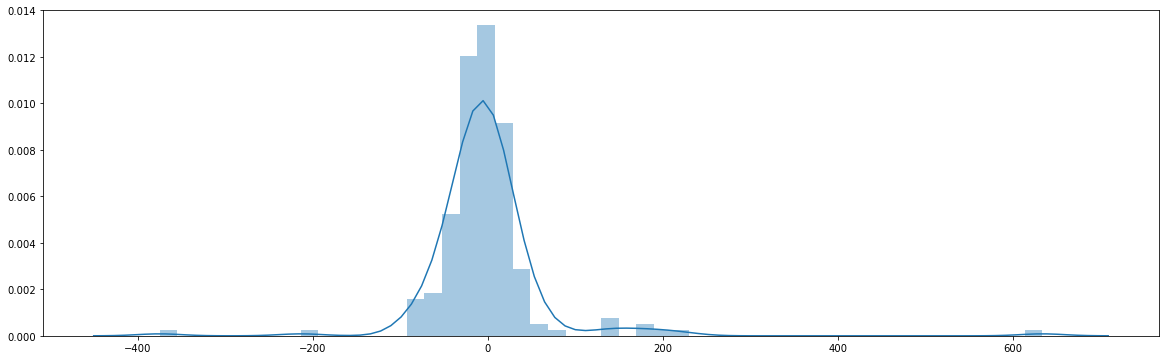

In [19]:
plt.figure(figsize=(20, 6))
sns.distplot(y_test-model.predict(X_test))

Try More Complex Algrithms

In [20]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9005997177477467

<AxesSubplot:>

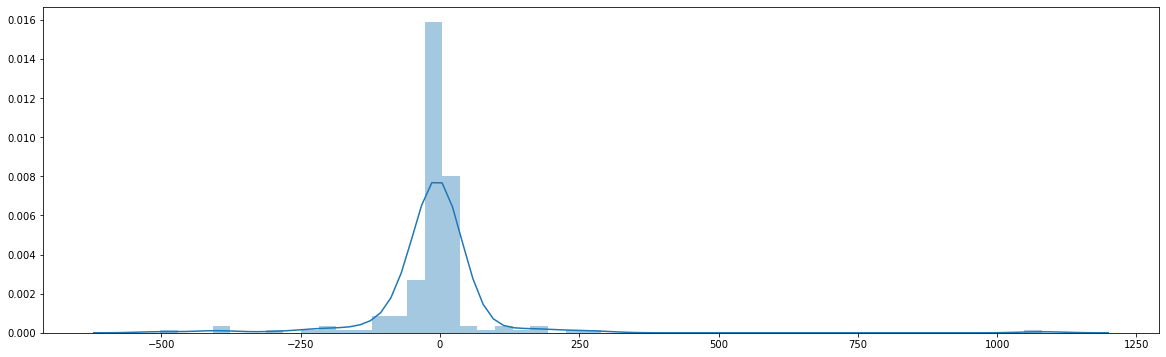

In [21]:
plt.figure(figsize=(20, 6))
sns.distplot(y_test-model.predict(X_test))

# Step - 5

## Performance Boosting / Parameter Tuning

Create Parameter Combinations

In [22]:
n_estimators = np.arange(100, 1201, 100, np.int)


max_features = ['auto', 'sqrt']

max_depth = np.arange(5, 31, 5, np.int)


min_samples_split = [2, 5, 10, 15, 100]


min_samples_leaf = [1, 2, 5, 10]

In [23]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
        }

In [24]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = param_grid,
    scoring='neg_mean_squared_error', 
    n_iter = 10, cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1
)

In [25]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-30542.185, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-22028.500, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-157404.644, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-12119.308, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-62856.388, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-31328.690, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt,

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, score=-12097.471, total=   0.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, score=-63582.805, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-31031.070, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-24805.712, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

Check Best Parameters for Model

In [26]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

## Visualize Model Performance

In [27]:
predictions=rf_random.predict(X_test)

<AxesSubplot:>

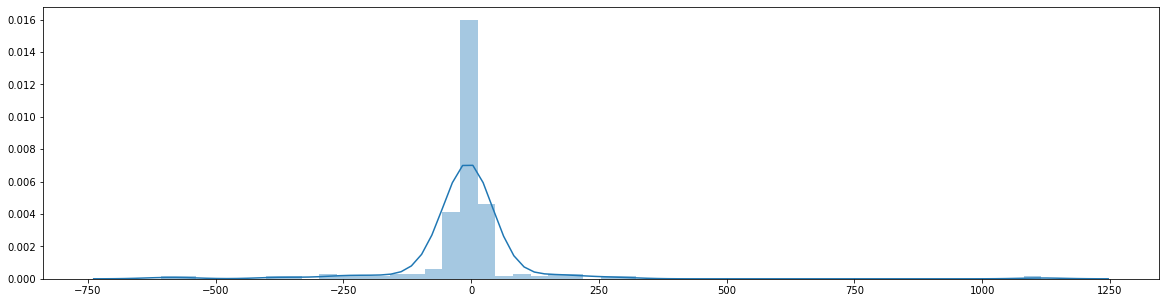

In [28]:
plt.figure(figsize=(20, 5))
sns.distplot(y_test-predictions)

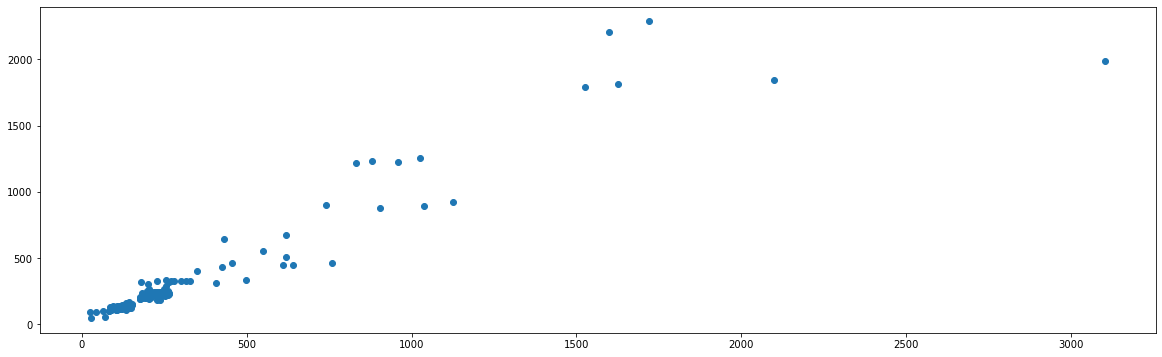

In [29]:
plt.figure(figsize=(20, 6))
plt.scatter(y_test,predictions)

  Looks like Simple Linear Regression is working better so we can use Linear Regression Model

# The End